# Importing the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.shape

(41199, 21)

In [6]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
data['marital']

0        married
1        married
2        married
3        married
4        married
          ...   
41194    married
41195    married
41196    married
41197        NaN
41198    married
Name: marital, Length: 41199, dtype: object

In [8]:
c=data['marital'].value_counts().tolist()
c

[24934, 11568, 4612, 80]

In [9]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

# Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.

with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.1

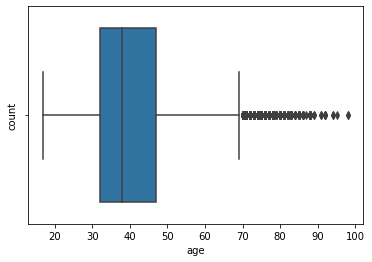

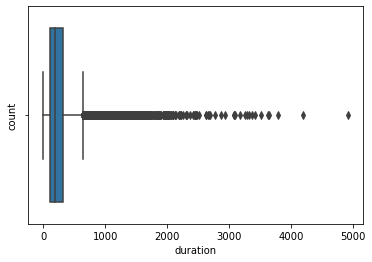

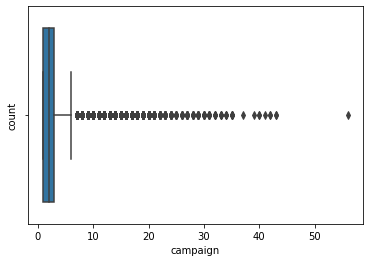

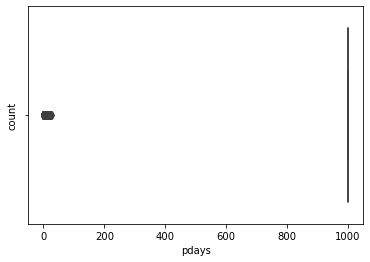

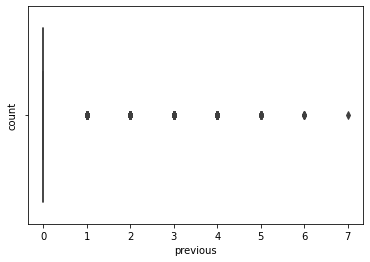

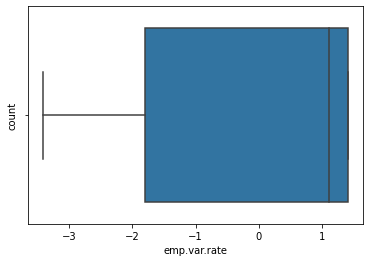

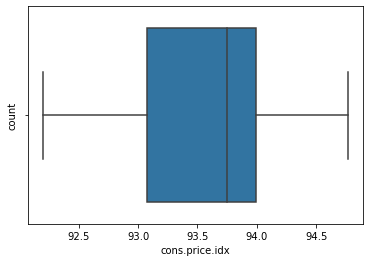

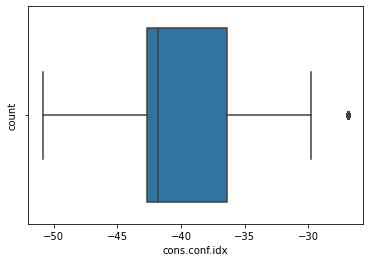

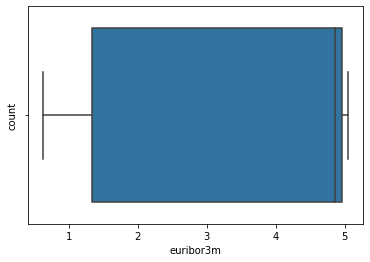

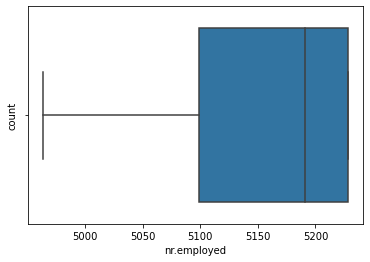

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

With reference to the above plot we can observe that some columns are having outliers .
So what actually outliers are  ,The values greater than upper limit and values lesser than lower limit .

Consider for age column
where  1st quantile /25th percentile value(Q1)  and 3rd quantile /75th percentile value(Q3)values are 
data.age.quantile(.25),data.age.quantile(.75)=(32.0, 47.0)

With the help of Q1 and Q3 we will be finding out Inter Quantile Range (IQR) for Outlier analysis

Lets start with  age column 

1.age

There are outliers

2.duration

There are outliers

3.campaign

There are outliers

4.pdays

There are no outliers

5.previous

There are no outliers

6.emp.var.rate

There are no outliers

7.cons.price.idx

There are no outliers

8.cons.conf.idx

There are  outliers

9.nr.employed

There are no outliers

so from above inference only 4 columns as outliers those are 'age','duration','campaign','cons.conf.idx' .
So in next step we'll be handling it,


# IQR method

Now with the IQR method we will be removing the outlier 


The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median


(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR
upper limit=Q3+1.5*IQR

so consider for age column

Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

(9.5 , 69.5)

so we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all 4 ('age','duration','campaign','cons.conf.idx' ) columns.

In [11]:
#handling outliers

col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

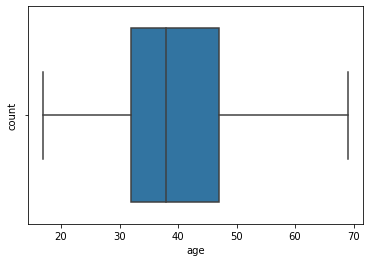

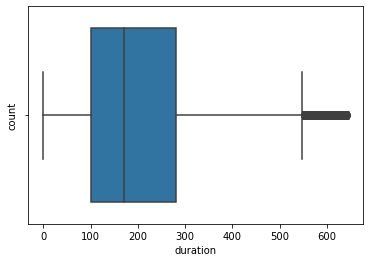

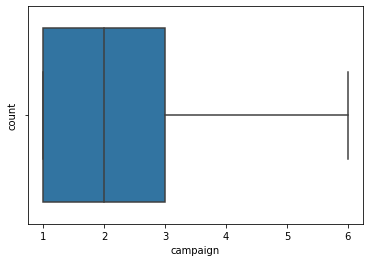

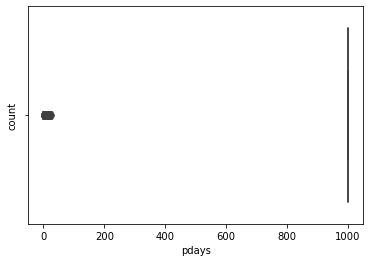

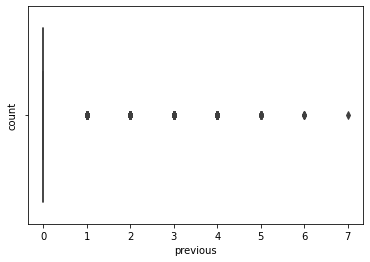

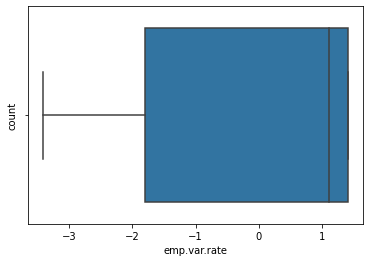

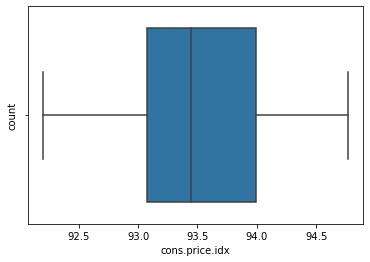

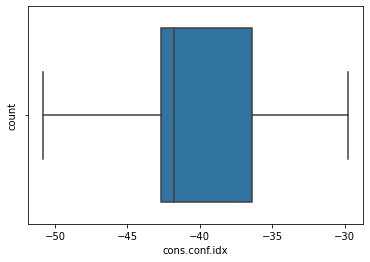

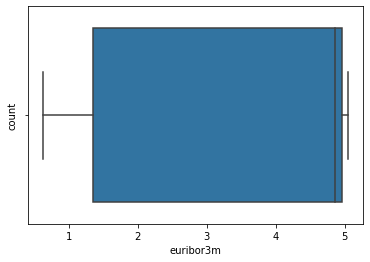

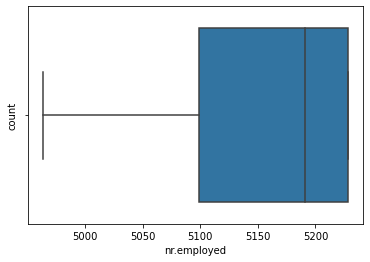

In [12]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [13]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:

data['y'] = np.where(data['y'] == 'yes',1,0)


In [15]:
data['y'] = data['y'].astype(str)

In [16]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [17]:
#taking all columns in single list
col_list = list(data.columns)

In [18]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [28]:

for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

In [21]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:


data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.

In [29]:

bins = [0, 50, 100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [31]:
data['age'].value_counts()/len(data['age'])

(0, 50]      0.836081
(50, 100]    0.163919
Name: age, dtype: float64

In [32]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(0, 50]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(0, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [34]:
data.age.value_counts()

(0, 50]      29410
(50, 100]     5766
Name: age, dtype: int64

# 1.Chi-Square test

In [ ]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency

###Chisq Test for Independence
dataset_table=pd.crosstab(data['age'],data['y'])
print(dataset_table)

In [ ]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

In [ ]:
val=chi2_contingency(dataset_table)
val

In [ ]:
val[3]

In [ ]:
Expected_Values=val[3]
Expected_Values

In [ ]:
a=zip(Observed_Values,Expected_Values)

In [ ]:
a

In [ ]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

In [ ]:
alpha = 0.05
print("chi-square statistic:-",chi_square_statistic)


In [ ]:
critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

In [ ]:
di={'Age':p_value}
df=pd.DataFrame()
df.append(di,ignore_index=True)

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
###Chisq Test for Independence for all object fields
col_list = list(data.columns)
col_list.remove('y')
df=pd.DataFrame(columns=['Feature','P-value'])

for col in col_list:
    if data[[col]][col].dtype == 'object': 
        dataset_table=pd.crosstab(data[col],data['y'])
        Observed_Values = dataset_table.values 
        val=chi2_contingency(dataset_table)
        Expected_Values=val[3]
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        no_of_rows=Observed_Values.shape[0]
        no_of_columns=Observed_Values.shape[1]
        ddof=(no_of_rows-1)*(no_of_columns-1)
        alpha = 0.05
        critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
        
df

In [ ]:
df=pd.DataFrame(columns=['Feature','P-value'])

In [ ]:
df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)

In [ ]:
print(df)

In [ ]:
data.drop(columns = ['loan','housing'],inplace = True)

In [ ]:
data.head()

In [ ]:
data

# IV analysis

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [ ]:
data

In [ ]:
data['y'] = data['y'].astype(int)

In [ ]:
df_new=pd.DataFrame(columns=['Feature','IV-Score'])

In [ ]:
data

In [ ]:
col_list = list(data.columns)
for col in col_list:
    if col == 'y': 
        continue
    elif data[col].dtype == 'object':
        df, iv = calculate_woe_iv(data, col, 'y')
        df_new=df_new.append({'Feature':col, 'IV-Score': iv}, ignore_index=True)
df_new

In [ ]:
###Drop fields with low IV
data.drop(columns = ['age', 'marital', 'education', 'day_of_week'],inplace = True)

In [ ]:
data.columns

In [ ]:
data.dtypes

# Label encoding

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [ ]:
data

# 3.VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


In [ ]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['nr.employed'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['cons.price.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['euribor3m'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [ ]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

In [ ]:
data

# Model building

In [ ]:
Ind_Features = list(data.columns)
Ind_Features.remove('y')
x = data[Ind_Features]
y = data['y']

In [ ]:
data

In [ ]:
y

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

SC=StandardScaler()
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)


In [ ]:
pd.DataFrame(x_train)

In [ ]:
pd.DataFrame(x_test)

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
test_pred

# predict proba

In [ ]:
#predict proba
proba_valid = pd.DataFrame(logisticRegr.predict_proba(x_test)[:, 1])

In [ ]:
x_test

In [ ]:
logisticRegr.predict_proba(x_test)

In [ ]:
proba_valid

In [ ]:
df_new=pd.DataFrame({'Predictions':test_pred})

In [ ]:
df_new

In [ ]:
df_new.insert(1, "Y_predict_proba", proba_valid)

In [ ]:
df_new

In [ ]:
df_new['Y_pred_0.1']=np.where((df_new['Y_predict_proba']>0.1), 1,0)

In [ ]:
df_new

In [ ]:
df_new['Y_pred_0.2']=np.where(df_new['Y_predict_proba']>0.2,1,0)
df_new['Y_pred_0.3']=np.where(df_new['Y_predict_proba']>0.3, 1,0)
df_new['Y_pred_0.4']=np.where(df_new['Y_predict_proba']>0.4, 1,0)
df_new['Y_pred_0.5']=np.where(df_new['Y_predict_proba']>0.5, 1,0)
df_new['Y_pred_0.6']=np.where(df_new['Y_predict_proba']>0.6, 1,0)
df_new['Y_pred_0.7']=np.where(df_new['Y_predict_proba']>0.7, 1,0)
df_new['Y_pred_0.8']=np.where(df_new['Y_predict_proba']>0.8, 1,0)
df_new['Y_pred_0.9']=np.where(df_new['Y_predict_proba']>0.9, 1,0)

In [ ]:
df_new

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])

In [ ]:
c1

In [ ]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

In [ ]:
sep=c1[1,1]/(c1[1,1]+c1[1,0])
sep

In [ ]:
d11=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])

In [ ]:
d11=d11.append({'cutoff':0.2, 'Sensitivity': sen,'Specificity':sep}, ignore_index=True)

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.1'])
c2=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.2'])
c3=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.3'])
c4=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.4'])
c5=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.5'])
c6=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.6'])
c7=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.7'])
c8=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.8'])
c9=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'Y_pred_0.9'])

In [ ]:
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [ ]:
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [ ]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])

In [ ]:
d_cutoff_value

In [ ]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1, 'Sensitivity': sen1,'Specificity':sep1}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2, 'Sensitivity': sen2,'Specificity':sep2}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3, 'Sensitivity': sen3,'Specificity':sep3}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4, 'Sensitivity': sen4,'Specificity':sep4}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5, 'Sensitivity': sen5,'Specificity':sep5}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6, 'Sensitivity': sen6,'Specificity':sep6}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7, 'Sensitivity': sen7,'Specificity':sep7}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8, 'Sensitivity': sen8,'Specificity':sep8}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9, 'Sensitivity': sen9,'Specificity':sep9}, ignore_index=True)
d_cutoff_value

In [ ]:
for i in range(9):
    
    d_cutoff_value.loc[i,'Total_val']=d_cutoff_value.loc[i,'Sensitivity']+d_cutoff_value.loc[i,'Specificity']

In [ ]:
d_cutoff_value


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
test_pred_prob = logisticRegr.predict_proba(x_test)
test_pred_prob

# roc curve and auc

In [ ]:
# roc curve and auc
#Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores->how much data has been understood by the model
auc = roc_auc_score(np.array(y_test), test_pred_prob[:, 1])

# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves

fpr, tpr, threshold = roc_curve(np.array(y_test), test_pred_prob[:, 1])
# plot the roc curve for the model

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()